### 1. Stride Time and Length  

1. 보폭 range(time)를 영상을 보면서 구한다
2. Time range 사이의 **시간 변화량(= Stride Time)**이다.
3. 왼쪽 앞발 부위 중 끝 부분인 Left Distal Phalanx_2의 time range 사이에의 **pixel 변화값(=Stride Length)**을 구한다.
4. 각각의 plotting
    - Length
    - Time

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# 0. Load the preprocessed data 
dir_path = os.getcwd()
# df_1 = pd.read_csv(dir_path + '/data/trial_1_processed.csv')
# df_2 = pd.read_csv(dir_path + '/data/trial_2_processed.csv')
df_1 = pd.read_pickle(dir_path + '/data/trial_1_processed.pkl')
df_2 = pd.read_pickle(dir_path + '/data/trial_2_processed.pkl')

In [3]:
df_1

LeftEye                   LeftEar                   Occiput  \
               x            y            x            y            x   
036  1257.018782  1008.147025  1295.576087     998.9268  1296.414289   
041  1214.270465  996.4121932  1254.504175  982.1627544  1277.973839   
047  1148.052485  997.2503955  1189.962599  987.1919681   1215.94687   
054   1046.63001  988.8683727  1086.863719  979.6481476  1113.686192   
060  974.5446135  973.7807316  1012.263716  969.5897202  1039.924391   
063   934.310904  974.6189339  971.1918043  973.7807316  1000.528884   
069  851.8069056  990.8349912  885.0193102   987.144724  915.1564921   
076  771.8511167   977.919056  805.6785658  974.2287889  842.5812376   
082  694.9705504  982.8394123  727.5679105   976.688967  765.0856268   
088  607.0191827   977.919056  640.8466318  971.1535662  673.4439919   
092  559.6607539  972.3836553  591.0280249  964.3880764  626.7006076   
097  493.2359446  978.5341006  525.2182602  976.0739224  561.5058875   
106  370.8420832  977.3040115  404.0544878  971.1535662   437.881937   
109  333.3243669  977.3040115  371.4571277  972.3836553  408.3597995   
117  218.9260843  992.6801248  247.8331772  984.6845459  290.8862943   
126  112.5233807  981.6093232  140.2003845  974.2287889  186.9437688   
135          NaN          NaN  12.27112229  1004.981015  52.24901673   
146          NaN          NaN          NaN          NaN          NaN   
169          NaN          NaN          NaN          NaN          NaN   

                   OriginTail                   EndTail               ...  \
               y            x            y            x            y  ...   
036  998.0885977  1315.692941  999.7650023          NaN          NaN  ...   
041  993.0593841          NaN          NaN          NaN          NaN  ...   
047  992.2211818  1430.526654  1031.616689          NaN          NaN  ...   
054  977.1335408  1326.589571  1024.072868  1384.425528  1055.086353  ...   
060  970.4279225  1243.607545  1020.720059  1305.634514   1057.60096  ...   
063  975.4571362  1195.830015  1001.441407  1273.782827  1033.293093  ...   
069   987.144724  1119.966321  1000.060659  1184.545996  1017.281906  ...   
076  975.4588779  1030.169819  1012.976594  1099.669851  1054.184578  ...   
082  974.2287889  952.6742084  1009.901372  1012.333528  1047.419088  ...   
088  971.1535662  874.5635532  1008.671283  931.7626944  1036.963331  ...   
092  965.0031209    819.82459  1004.365971  886.2493992  1032.042975  ...   
097  974.8438334  754.0148253  998.2155255  816.1343228   1017.89695  ...   
106  971.7686107  639.0014982  1003.135882  697.4307286  1033.273064  ...   
109  971.1535662    603.94396  1013.591639  658.6829232  1042.498732  ...   
117  979.1491451  497.5412564  1004.365971  557.2005757  1033.888108  ...   
126  971.7686107  391.1385527  1008.056238  455.1031838  1032.042975  ...   
135  1000.675704  271.8199139  990.2199466  341.3199458  990.2199466  ...   
146          NaN  144.5056962  1009.901372  204.7800601  1045.573954  ...   
169          NaN  55.32423938  1030.197841  105.7578908  1083.091671  ...   

        LeftKnee                 LeftAnkle                  LeftHeel  \
               x            y            x            y            x   
036          NaN          NaN          NaN          NaN          NaN   
041  1401.189574  1096.996467  1406.218787  1164.052649  1430.526654   
047  1351.735639  1107.893096   1329.94238  1173.272874  1338.324403   
054  1280.488446  1114.598715   1322.39856  1165.729054  1334.971594   
060  1251.989568  1126.333547  1320.722155   1160.69984  1332.456987   
063  1243.607545  1112.084108  1303.958109  1165.729054  1323.236762   
069  1095.364539   1096.62265  1158.714126  1107.078407  1175.935373   
076  952.0591639  1080.631493  908.3910023  1143.366035  910.8511804   
082  878.8688649  1078.786359  894.8600226  1144.596124  905.3157796   
088  883.1741766  1139.060723   902.240557  1135.370456  862.2626626   
092  825.35999

In [4]:
df_1.index

Index(['036', '041', '047', '054', '060', '063', '069', '076', '082', '088',
       '092', '097', '106', '109', '117', '126', '135', '146', '169'],
      dtype='object')

In [5]:
df_1.columns

MultiIndex([(             'LeftEye', 'x'),
            (             'LeftEye', 'y'),
            (             'LeftEar', 'x'),
            (             'LeftEar', 'y'),
            (             'Occiput', 'x'),
            (             'Occiput', 'y'),
            (          'OriginTail', 'x'),
            (          'OriginTail', 'y'),
            (             'EndTail', 'x'),
            (             'EndTail', 'y'),
            (       'RightShoulder', 'x'),
            (       'RightShoulder', 'y'),
            (          'RightElbow', 'x'),
            (          'RightElbow', 'y'),
            (          'RightWrist', 'x'),
            (          'RightWrist', 'y'),
            (       'RightMCPjoint', 'x'),
            (       'RightMCPjoint', 'y'),
            ('RightDistalPhalanx_1', 'x'),
            ('RightDistalPhalanx_1', 'y'),
            (           'RightKnee', 'x'),
            (           'RightKnee', 'y'),
            (          'RightAnkle', 'x'),
           

In [6]:
df_2

LeftEye                   LeftEar                   Occiput  \
               x            y            x            y            x   
008  1397.258884    1010.8628          NaN          NaN          NaN   
018  1279.251977  1006.013202  1323.437212  1000.085914  1347.146362   
024  1216.746036  995.7751595  1259.853582  988.7701833  1288.951175   
031  1167.711203  989.8478719   1209.74106  982.3040514  1235.605587   
043   1035.66726  996.0072435  1075.998941  987.9409073  1102.679899   
047  995.3355787  986.0794451  1035.046772  977.3926215  1059.245781   
054  912.8107543  990.4228569  951.2809732  980.4950585  977.3414441   
067  775.0625511  988.5613947  812.9122826  978.0131089  839.5932409   
072  721.0801471  994.1457813  758.9298787  984.8384703   791.815711   
095  467.9212872   1004.07358  502.6685817  996.6277309   535.554414   
099  418.9027825  1006.555529  457.3730014  994.7662687  489.0178589   
121  198.6297548  991.6638317  237.0999737  977.3926215  278.6726297   
124   172.569284  986.0794451  214.1419399  975.5311593  250.1302092   
126  155.8161241  985.4589577  193.0453682  973.0492096  234.6180241   
137  25.51376972  1010.898941  63.36350123  998.4891931  102.4542075   
140          NaN          NaN  33.58010595  991.6638317  78.87568628   
177          NaN          NaN          NaN          NaN          NaN   
212          NaN          NaN          NaN          NaN          NaN   

                   OriginTail                   EndTail               ...  \
               y            x            y            x            y  ...   
008          NaN          NaN          NaN          NaN          NaN  ...   
018  987.1536503          NaN          NaN          NaN          NaN  ...   
024  981.2263627          NaN          NaN          NaN          NaN  ...   
031   984.998273          NaN          NaN          NaN          NaN  ...   
043  985.4589577  1314.886591  1023.929177  1380.658255  1071.086219  ...   
047  976.7721341  1267.109061  1030.754538  1326.055364  1074.188656  ...   
054  984.2179829   1195.75301   1020.82674  1253.458338  1039.441362  ...   
067  979.2540837  1056.763832   1035.09795  1108.264286  1072.327194  ...   
072  986.0794451  991.6126543  1025.170151  1053.040907  1072.947681  ...   
095  994.1457813  745.2791558  1005.314555  806.7074086  1029.513563  ...   
099  990.4228569  695.0196763  997.8687057  763.2732905  1034.477462  ...   
121  978.0131089  479.7105478  1011.519429   535.554414  1053.092084  ...   
124  973.6696971  460.4754384  1020.206252  515.6988171  1062.399396  ...   
126  975.5311593  441.8608163  1018.965277  505.1505313  1057.435496  ...   
137  997.2482183  324.5886974   1001.59163   387.257925  1025.170151  ...   
140  990.4228569  290.4618903   1004.07358  352.5106305  1047.507698  ...   
177          NaN  35.44156815  1038.820874  108.6590816  1070.465732  ...   
212          NaN          NaN          NaN          NaN          NaN  ...   

        LeftKnee                 LeftAnkle                  LeftHeel  \
               x            y            x            y            x   
008          NaN          NaN          NaN          NaN          NaN   
018          NaN          NaN          NaN          NaN          NaN   
024  1418.812657  1093.305982   1436.59452  1152.578857          NaN   
031  1357.923249  1116.476288  1323.976056  1181.137606   1340.68023   
043  1268.350036  1120.725211  1326.055364  1174.707615  1340.326574   
047   1252.83785   1130.65301  1317.989028  1166.020792  1331.639751   
054  1229.259329  1122.586673   1288.82612  1144.303733  1301.856355   
067  959.3473094   1097.14669  935.1483008  1168.502741  941.9736622   
072  906.6058803  1100.869614  897.2985693  1174.707615  909.0878299   
095  747.7611054  1104.592539  818.4966692  1126.309598  830.2859299   
099  652.8265329  1090.321329  709.2908865    1111.4179  723.5620968   
121  436.2764297   1097.14669  493.3612707  1150.508607  510.1144305   
124  427.5896061  1

In [7]:
# 1. Stride time range
# Left Distal Phalanx_2 를 기준으로 측정함.
focusing_column = 'LeftDistalPhalanx_2'
stride_time_range_list_1 = [
    ('036', '063'),
    ('063', '097'),
    ('097', '126')
]
stride_time_range_list_2 = [
    ('024', '054'),
    ('054', '095'),
    ('095', '137')
]

In [35]:
stride_frame_1 = []
p = re.compile('(0?)([0-9]+)')
for f_i, f_j in stride_time_range_list_1:
    f_i = p.search(f_i)
    f_j = p.search(f_j)
#     print('f_i:', f_i, '\nf_j:', f_j)
    formula = f_j[2] + '-' + f_i[2]
    print(formula)
    stride_frame_1.append(eval(formula))
print('stride frame 1:',stride_frame_1)

63-36
97-63
126-97
stride frame 1: [27, 34, 29]


In [36]:
stride_frame_2 = []
p = re.compile('(0?)([0-9]+)')
for f_i, f_j in stride_time_range_list_2:
    f_i = p.search(f_i)
    f_j = p.search(f_j)
#     print('f_i:', f_i, '\nf_j:', f_j)
    formula = f_j[2] + '-' + f_i[2]
    print(formula)
    stride_frame_2.append(eval(formula))
print('stride frame 2:', stride_frame_2)

54-24
95-54
137-95
stride frame 2: [30, 41, 42]


In [37]:
stride_length_1 = []
for i, j in stride_time_range_list_1:
    t_i = df_1[focusing_column]['x'][i]
    t_j = df_1[focusing_column]['x'][j]
    print(f't_1: {t_i}, t_2: {t_j}')
    if pd.isna(t_i) or pd.isna(t_j): # case that any cells have nan
        print('1')
        pass
    else:
        print('2')
        string_fomula = f'{t_i}-{t_j}' # 왼쪽 화면 끝 기준이라 점점 x가 작아짐. 
        print(string_fomula)
        stride_length_1.append(eval(string_fomula))
print('stride length 1:', stride_length_1)

t_1: nan, t_2: 1293.899682
1
t_1: 1293.899682, t_2: 840.1210595
2
1293.899682-840.1210595
t_1: 840.1210595, t_2: 427.4261799
2
840.1210595-427.4261799
stride length 1: [453.7786225, 412.6948796]


In [38]:
stride_length_2 = []
for i, j in stride_time_range_list_2:
    t_i = df_2[focusing_column]['x'][i]
    t_j = df_2[focusing_column]['x'][j]
    print(f't_1: {t_i}, t_2: {t_j}')
    if pd.isna(t_i) or pd.isna(t_j): # case that any cells have nan
        print('1')
        pass
    else:
        print('2')
        string_fomula = f'{t_i}-{t_j}' # 왼쪽 화면 끝 기준이라 점점 x가 작아짐. 
        print(string_fomula)
        stride_length_2.append(eval(string_fomula))
print('stride length 2:', stride_length_2)

t_1: 1398.875417, t_2: 1282.000758
2
1398.875417-1282.000758
t_1: 1282.000758, t_2: 837.7317787
2
1282.000758-837.7317787
t_1: 837.7317787, t_2: 364.9203785
2
837.7317787-364.9203785
stride length 2: [116.87465900000007, 444.26897929999996, 472.8114001999999]


In [41]:
# Answer lists
frame_velocity = 30 #frames/sec
time_length_convert = lambda x: x/30

print(f'stride frame 1: {stride_frame_1} [frames] \nstride frame 2: {stride_frame_2} [frames]')
stride_time_1 = list(map(time_length_convert, stride_frame_1.copy()))
stride_time_2 = list(map(time_length_convert, stride_frame_2.copy()))
print(f'stride time 1: {stride_time_1} [sec] \nstride time 2: {stride_time_2} [sec]')
print(f'stride length 1: {stride_length_1} [px] \nstride length 2: {stride_length_2} [px]')

stride frame 1: [27, 34, 29] [frames] 
stride frame 2: [30, 41, 42] [frames]
stride time 1: [0.9, 1.1333333333333333, 0.9666666666666667] [sec] 
stride time 2: [1.0, 1.3666666666666667, 1.4] [sec]
stride length 1: [453.7786225, 412.6948796] [px] 
stride length 2: [116.87465900000007, 444.26897929999996, 472.8114001999999] [px]


<BarContainer object of 3 artists>

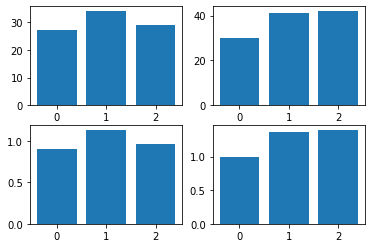

In [42]:
fig, axes = plt.subplots(2,2)
axes[0][0].bar(list(range(len(stride_frame_1))), stride_frame_1)
axes[0][1].bar(list(range(len(stride_frame_2))), stride_frame_2)
axes[1][0].bar(list(range(len(stride_time_1))), stride_time_1)
axes[1][1].bar(list(range(len(stride_time_2))), stride_time_2)

In [43]:
print('stride frame 1:', round(np.mean(stride_frame_1), 2), 'frames')
print('stride frame 2:', round(np.mean(stride_frame_2[1:]), 2), 'frames')
print('stride time 1:', round(np.mean(stride_time_1), 2), 'sec')
print('stride time 2:', round(np.mean(stride_time_2[1:]), 2), 'sec')

stride frame 1: 30.0 frames
stride frame 2: 41.5 frames
stride time 1: 1.0 sec
stride time 2: 1.38 sec
